# EXPLORATION_1

#### 모듈 정리

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 1. digits

### 1.1 데이터 분석

1) load_digits 를 통해 데이터를 불러오면 7개의 key 값을 확인 할 수 있다.

In [4]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2) 'DESCR'은 데이터의 설명을 기재한 항목으로 가장 우선적으로 확인

In [5]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

3) 데이터 요약  
 - 인스턴스 수 : 1797  
 - 속성 수 : 64  
 - 속성정보 : 0~16 사이의 정수이며, 8x8 픽셀  
 - 결측치 : 없음  
 - 만든이 : E. Alpaydin  
 - 날짜 : 7월, 1998년
 - 특징 : 필기체로 작성된 숫자 데이터 세트

4) data를 상세하게 확인

In [6]:
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


In [7]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- data는 총 1797개가 있고 각 데이터는 64개의 숫자로 이루어져있음.  
- array를 보면 픽셀값이라고 생각이 들지만 확인 필요
- pandas의 DataFrame으로 변환하여 column을 확인

In [8]:
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
print(digits_df.head(5))

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

- 이미지인지 확인하기 위해 matplotlib 라이브러리를 이용

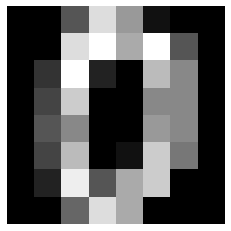

In [9]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

- 이미지 확인을 했으나 숫자 0인지 알파벳 o인지 한글 ㅇ인지 알 수 없음  
- 다른 데이터도 확인이 필요  
- subplot을 이용해 2줄 5개의 데이터를 한번에 확인

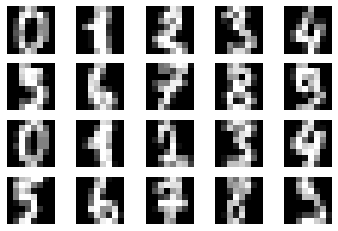

In [10]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

 - 숫자 데이터임을 확인했으므로 이에 따른 모델 학습목표 설정

### 1.2 목표 설정
 - 데이터셋을 통해 학습 후 임의의 정수형 숫자 손글씨 데이터를 입력받아 해당 숫자를 출력하는 모델을 만들자


In [71]:
digits_labels = digits.target
print(digits_data)
print("==================================")
print(digits_labels)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


 - 데이터셋 확인을 위해 digits_data에 저장, Label Data 지정
라벨을 살펴보면 target_names는 0~9까지라 예상된다. 확인해보자

In [72]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


### 1.3 모델 학습

1) 학습 데이터 준비
- 학습을 위해 train, test set으로 분리  
  모델에 입력할 데이터는 X, 비교할 정답 데이터는 y, 학습 데이터는 train, 테스트 데이터는 test로 분리  
  data_size=0.2로 테스트용 데이터는 20%로 구성하고 random_state 값을 통해 분리할 때 데이터를 랜덤 구성

In [132]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


- .shape로 데이터가 잘 나뉘었는지 확인한다.

2) 모델 적용
- 어떤 모델이 적합한지 확인이 필요하므로 5가지 모델을 다 적용해 본다.  
  (Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)  
- 모델의 평가는 sklearn의 Classification_report를 import하여 확인한다.

1) Decision Tree

In [74]:
decision_tree_digit = DecisionTreeClassifier(random_state=20)
decision_tree_digit.fit(X_train, y_train)
y_pred = decision_tree_digit.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.76      0.84      0.80        38
           2       0.94      0.87      0.90        38
           3       0.75      0.78      0.76        27
           4       0.97      0.83      0.89        41
           5       0.85      0.97      0.91        35
           6       0.85      0.89      0.87        38
           7       0.82      0.94      0.88        34
           8       0.72      0.66      0.69        35
           9       0.88      0.81      0.84        43

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



2) Random Forest

In [75]:
random_forest_digit = RandomForestClassifier(random_state=32)
random_forest_digit.fit(X_train, y_train)
y_pred = random_forest_digit.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.95      0.97      0.96        38
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        27
           4       0.95      1.00      0.98        41
           5       0.97      1.00      0.99        35
           6       1.00      0.95      0.97        38
           7       1.00      1.00      1.00        34
           8       0.94      0.97      0.96        35
           9       1.00      0.98      0.99        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



3) SVM

In [136]:
svm_model_digit = svm.SVC()
svm_model_digit.fit(X_train, y_train)
y_pred = svm_model_digit.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



4) SGD Classifier

In [144]:
sgd_model_digits = SGDClassifier()
sgd_model_digits.fit(X_train, y_train)
y_pred = sgd_model_digits.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.97      0.82      0.89        38
           2       1.00      0.97      0.99        38
           3       1.00      0.85      0.92        27
           4       0.93      1.00      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.92      0.96        38
           7       0.94      1.00      0.97        34
           8       0.77      0.94      0.85        35
           9       0.91      0.95      0.93        43

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



5) Logistic Regression

In [78]:
losistic_model_digits = LogisticRegression(max_iter=5000)
losistic_model_digits.fit(X_train, y_train)
y_pred = losistic_model_digits.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.93      1.00      0.96        41
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### 1.4 결과분석

classification report에 아래와 같은 내용들이 나온다.
 - Precision은 Confusion matrix에서 TP / TP + FP이다.(양성으로 예측한 샘플 중 실제 양성인 비율)
 - Recall은 TP / TP + FN(실제 양성 중 양성이라고 예측한 비율)
 - Accuracy는 TP + TN / TN + TP + FN + FP (전체 샘플 중 맞게 예측한 샘플 수의 비율)
 - F1-score는 precision과 recall의 가중 조화평균이다. 

- 가장 먼저 Accuracy로 탈락시킬 모델이 보인다. - Decision tree  
  약 85%의 정확도로 나머지 모델에 비해 터무니 없이 낮다.  
  Decision tree의 단점 중 하나인 과적합으로 인해 정확도가 떨어진 것이라 판단된다.
    
    
- Stochastic Gradient Descent는 20번 수행했을 때 정확도가 들쑥날쑥한 모습(0.91~0.96)을 보여준다.  
  이는 랜덤 추출한 일부 데이터에 대해 가중치를 조절했기 때문이라고 판단된다.  
    
    
- 나머지 모델들은 사실 어떤 것을 고르더라도 큰 차이는 없을 것으로 보인다.  
  
    
- Logistic Regression의 경우 iter_max의 사이즈가 지정되어 있어 오류 메시지를 보여준다.   
  (max_iter=10)를 통해 iter 값을 바꿀 수 있다. 반복 횟수(iter) 10회 미만일 때는 성능 편차가 크지만,   
  10회를 넘어갈수록 성능 변화가 미미함 따라서 가성비 있는 훈련은 10~20회 가량으로 판단되며,  
  iterations reached limit warning message를 보고 싶지 않으면 max_iter 값을 5000정도 주어 훈련하는 것을 권장

# 2. Wine

### 2.1 데이터 분석

1) load_wine 를 통해 데이터를 불러오면 7개의 key 값을 확인 할 수 있다.

In [79]:
wine = load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


2) 'DESCR'은 데이터의 설명을 기재한 항목으로 가장 우선적으로 확인

In [80]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

3) 데이터 요약  
 -  인스턴스 수 : 178(각각 50개씩 3개의 클래스로 구분)  
 -  속성 수 : 13개(Alcohol, Malic Acid, Ash 등...)  
 -  클래스 수 : 3개(class_0, class_1, class_2)  
 -  결측치 : 없음  
 -  만든이 : R.A. Fisher  
 -  생성일 : 7월, 1988년  

4) data를 상세하게 확인

In [81]:
wine_data = wine.data
print(wine_data.shape)

wine_targetnm = wine.target_names
print(wine_targetnm)

(178, 13)
['class_0' 'class_1' 'class_2']


- 178개의 데이터로 13개 속성으로 나뉨
- class_0, class_1, class_2 / 총 3개의 타겟으로 분류 필요

In [82]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
print(wine_df.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

- 'DESCR'를 통해 이미 13개의 속성이 무엇인지 알고 있지만, 확인 차원에서 출력

### 2.2 목표설정
 - 데이터셋의 13개의 속성을 통해 3개의 클래스로 분류 학습 후 다른 와인의 속성 값을 입력받으면 분류하는 모델을 만든다.

In [90]:
wine_labels = wine.target
print(wine_data)
print("==================================")
print(wine_labels)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


 - 학습을 위해 분류 전 마지막으로 Label Data 지정하고 확인

### 2.3 모델학습

1) 학습 데이터 준비
- 학습을 위해 train, test set으로 분리  
  모델에 입력할 데이터는 X, 비교할 정답 데이터는 y, 학습 데이터는 train, 테스트 데이터는 test로 분리  
  data_size=0.2로 테스트용 데이터는 20%로 구성하고 random_state 값을 통해 분리할 때 데이터를 랜덤 구성

In [111]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=15, stratify=wine_labels)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Counter({1: 71, 0: 59, 2: 48})
Counter({1: 71, 0: 59, 2: 48})
(142, 13) (142,)
(36, 13) (36,)
Counter({1: 71, 0: 59, 2: 48})


- .shape로 데이터가 잘 나뉘었는지 확인(총 178개의 데이터가 142, 36개로 잘 나뉨)

2) 모델 적용
- 어떤 모델이 적합한지 확인이 필요하므로 5가지 모델을 다 적용해 본다.  
  (Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)  
- 모델의 평가는 sklearn의 Classification_report를 import하여 확인한다.

1) Decision Tree

In [92]:
decision_tree_wine = DecisionTreeClassifier(random_state=22)
decision_tree_wine.fit(X_train, y_train)
y_pred = decision_tree_wine.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



2) Random Forest

In [93]:
random_forest_wine = RandomForestClassifier(random_state=32)
random_forest_wine.fit(X_train, y_train)
y_pred = random_forest_wine.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



3) SVM

In [94]:
svm_model_wine = svm.SVC()
svm_model_wine.fit(X_train, y_train)
y_pred = svm_model_wine.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.67      1.00      0.80        14
           2       0.75      0.30      0.43        10

    accuracy                           0.78        36
   macro avg       0.81      0.74      0.73        36
weighted avg       0.80      0.78      0.75        36



4) SGD Classifier

In [102]:
sgd_model_wine = SGDClassifier()
sgd_model_wine.fit(X_train, y_train)
y_pred = sgd_model_wine.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       1.00      0.29      0.44        14
           2       0.43      1.00      0.61        10

    accuracy                           0.64        36
   macro avg       0.81      0.68      0.64        36
weighted avg       0.84      0.64      0.63        36



5) Logistic Regression

In [130]:
losistic_model_wine = LogisticRegression(max_iter=5000)
losistic_model_wine.fit(X_train, y_train)
y_pred = losistic_model_wine.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.91      0.93      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



### 2.4 결과분석

classification report에 아래와 같은 내용들이 나온다.

- Precision은 Confusion matrix에서 TP / TP + FP이다.(양성으로 예측한 샘플 중 실제 양성인 비율)
- Recall은 TP / TP + FN(실제 양성 중 양성이라고 예측한 비율)
- Accuracy는 TP + TN / TN + TP + FN + FP (전체 샘플 중 맞게 예측한 샘플 수의 비율)
- F1-score는 precision과 recall의 가중 조화평균이다.

- 우선 SVM 모델에서 F-score zreo_division 경고가 발생했다. 원인은 wine_labels을 train, test dataset으로 분류할 때 data의 수가 적어 비율에 맞춰 분류되지 않았다고 판단하였고 stratify로 분포 비율을 일정하게 유지시켰다.  
  

- 가장 먼저 Accuracy로 탈락시킬 모델이 보인다. - SVM, SGD Classifier  
  이 두 모델은 데이터 수가 적은 경우에는 사용을 안하는 것이 좋겠다고 판단된다.  
  앞서 진행한 digits 데이터의 경우 약 1,700건으로 wine 데이터의 10배 정도 크기였다.  
  이에 따라 모델이 의미를 갖기 위해서는 적어도 1,000건이 넘는 인스턴스를 보유한 경우에만 사용하는 것이 좋겠다.
  

- 와인의 class를 분류하는 경우에는 정확도가 중요하다고 생각한다. Decision Tree, Random forest 둘 중 하나를 사용하여 모델을 만드는 것이 좋다고 생각하며 Logistic Regression의 경우 반복 횟수(iter) 42회 미만일 때는 성능 편차가 크지만, 42회를 넘어갈수록 성능 변화가 미미함 따라서 가성비 있는 훈련은 50~60회 가량으로 판단됨.  
iterations reached limit warning message를 보고 싶지 않으면 max_iter 값을 5000정도 주어 훈련하는 것을 권장

ㅡ
    
     

목표 : 13개의 속성을 통해 3개의 클래스로 분류 학습을 시키고, 다른 와인의 속성 값을 입력받으면 분류하여 클래스(품종)에 따라 출력하는 모델을 만든다!

# 3. Breast cancer

### 3.1 데이터 분석

1) load_breast_cancer 를 통해 데이터를 불러오면 8개의 key 값을 확인 할 수 있다.

In [30]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


2) 'DESCR'은 데이터의 설명을 기재한 항목으로 가장 우선적으로 확인

In [31]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

3) 데이터 요약

 - 인스턴스 수 : 569개
 - 속성 수 : 30개(radius, texture 등...)
 - 클래스 수 : 2개(WDBC-Malignant, WDBC-Benign) / Malignant - 212, Benign - 357
 - 결측치 : 없음
 - 만든이 : Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian
 - 생성일 : 11월, 1995년

4) data를 상세하게 확인

In [32]:
cancer_data = cancer.data
print(cancer_data.shape)

cancer_targetnm = cancer.target_names
print(cancer_targetnm)

(569, 30)
['malignant' 'benign']


- 569개의 데이터로 30개 속성으로 나뉨
- malignant, benign/ 총 2개의 타겟으로 분류 필요

In [33]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
print(cancer_df.head(5))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

 - 'DESCR'를 통해 이미 30개의 속성이 무엇인지 알고 있지만, 확인 차원에서 출력

### 3.2 목표설정
 - 데이터셋의 30개의 속성을 통해 2개의 클래스로 분류 학습 후 다른 데이터를 입력받으면 분류하는 모델을 만든다.

In [114]:
cancer_labels = cancer.target
print(cancer_data)
print("==================================")
print(cancer_label)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

- 학습을 위해 분류 전 마지막으로 Label Data 지정하고 확인

### 3.3 모델학습

1) 학습 데이터 준비

 - 학습을 위해 train, test set으로 분리  
   모델에 입력할 데이터는 X, 비교할 정답 데이터는 y, 학습 데이터는 train, 테스트 데이터는 test로 분리  
   data_size=0.2로 테스트용 데이터는 20%로 구성하고 random_state 값을 통해 분리할 때 데이터를 랜덤 구성

In [115]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)
Counter({1: 357, 0: 212})


 - .shape로 데이터가 잘 나뉘었는지 확인(총 569개의 데이터가 455, 114개로 잘 나뉨)

2) 모델 적용

 - 어떤 모델이 적합한지 확인이 필요하므로 5가지 모델을 다 적용해 본다.   
   (Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)   
 - 모델의 평가는 sklearn의 Classification_report를 import하여 확인한다.

1) Decision Tree

In [36]:
decision_tree_cancer = DecisionTreeClassifier(random_state=22)
decision_tree_cancer.fit(X_train, y_train)
y_pred = decision_tree_cancer.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



2) Random Forest

In [37]:
random_forest_cancer = RandomForestClassifier(random_state=32)
random_forest_cancer.fit(X_train, y_train)
y_pred = random_forest_cancer.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



3) SVM

In [38]:
svm_model_cancer = svm.SVC()
svm_model_cancer.fit(X_train, y_train)
y_pred = svm_model_cancer.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



4) SGD Classifier

In [39]:
sgd_model_cancer = SGDClassifier()
sgd_model_cancer.fit(X_train, y_train)
y_pred = sgd_model_cancer.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.75        39
           1       0.92      0.76      0.83        75

    accuracy                           0.80       114
   macro avg       0.79      0.82      0.79       114
weighted avg       0.83      0.80      0.80       114



5) Logistic Regression

In [40]:
losistic_model_cancer = LogisticRegression(max_iter=5000)
losistic_model_cancer.fit(X_train, y_train)
y_pred = losistic_model_cancer.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.91      0.93      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



### 3.4 결과분석

classification report에 아래와 같은 내용들이 나온다.

 - Precision은 Confusion matrix에서 TP / TP + FP이다.(양성으로 예측한 샘플 중 실제 양성인 비율)
 - Recall은 TP / TP + FN(실제 양성 중 양성이라고 예측한 비율)
 - Accuracy는 TP + TN / TN + TP + FN + FP (전체 샘플 중 맞게 예측한 샘플 수의 비율)
 - F1-score는 precision과 recall의 가중 조화평균이다.

- cancer의 진단에서 가장 중요하게 봐야할 부분은 recall이라고 생각한다. 실제 malignant를 benign으로 해석하면  
환자의 생명과 직결되는 큰 문제가 생기기 때문이다. 이에 recall 값을 비교하면 Decision Tree, Random forest,  
 SGD Classifier를 우선적으로 고려할 수 있다. 이후 Accuracy로 탈락시킬 모델은 - SGD Classifier로 정확도 90%를  
 넘지 못해 Decision Tree, Random forest 모델에 비해 터무니 없이 낮다.  
    
    
- Stochastic Gradient Descent는 digits, wine 분류에서도 불안정한 정확도를 보여서 마찬가지로 반복 수행함  
  마찬가지로 20번 수행했을 때 정확도가 들쑥날쑥한 모습(0.60~0.84)을 보여준다.
  SGD는 사용하기 어려울 것으로 판단됨 (정확도가 낮아 우선 탈락)
  
    
- 앞서 wine 분류와 동일하게 Logistic Regression의 반복 횟수(iter) 42회 미만일 때는 성능 편차가 크지만,   
  42회를 넘어갈수록 성능 변화가 미미함 따라서 가성비 있는 훈련은 50~60회 가량으로 판단되며,  
  iterations reached limit warning message를 보고 싶지 않으면 max_iter 값을 5000정도 주어 훈련하는 것을 권장   
  (정확도가 낮아 우선 탈락)